<h1> Produisez une étude de marché avec R ou Python 2 - Analyses Exploratoire </h1>

In [1]:
options(warn=-1)
library(dplyr)
library(FactoMineR)
library(factoextra)
library(ggplot2)
library(corrplot)
library(gmodels)
library(NbClust)
library(cowplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.92 loaded



<h1> Import Données D'etudes </h1>

In [2]:
#Import de données issu de la phase Import et Nettoyage
donnees_etudes = read.csv("~/OpenClassrooms/Projet 9/data/merged/donnees_etudes.csv",, 
    encoding = "UTF-8")
# On place nos noms de Pays en index
rownames(donnees_etudes) = donnees_etudes$Zone
head(donnees_etudes)

,Zone,Émissions..CO2eq..Viande..volaille.gigagrammes,Population,Production.Viande.de.Volailles.Milliers.de.tonnes,Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Prix.à.la.Consommation..Indices.généraux..2015...100..,Croissance.annuelle.US..Produit.Intérieur.Brut..,Stabilité.politique.et.absence.de.violence.terrorisme..indice.
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Afghanistan,Afghanistan,11.4021,36296.113,28,29,0,109.5907,4.865790,-2.80
Afrique du Sud,Afrique du Sud,617.8128,57009.756,1667,514,63,112.0963,17.771989,-0.28
Albanie,Albanie,11.5674,2884.169,13,38,0,103.2957,9.765944,0.38
Algérie,Algérie,490.2887,41389.189,275,2,0,112.3586,6.287889,-0.92
Allemagne,Allemagne,458.2107,82658.409,1514,842,646,102.0087,6.441277,0.59
Angola,Angola,160.8742,29816.766,42,277,0,169.8029,20.766647,-0.38


In [3]:
sum(is.na(donnees_etudes))

[1] 0

Heatmap de corrélation de nos variables:

[1] "forte corrélation présente au groupe 'Valeur US IED', 'Valeur US PIB' et 'Production Viande Volaile'"


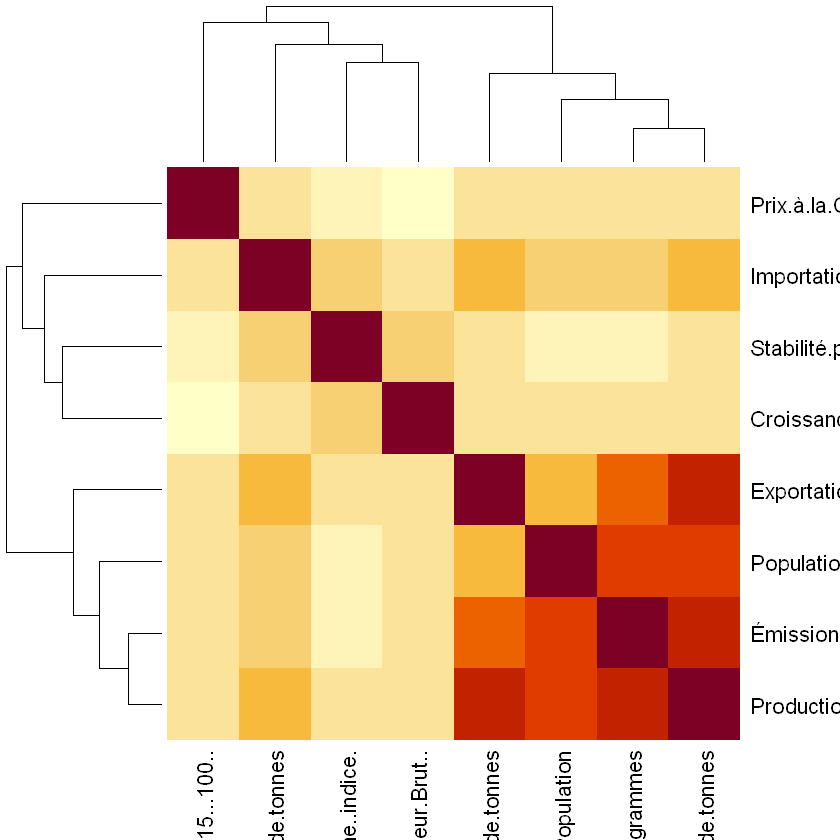

In [4]:
heatmap(donnees_etudes %>% select(!c("Zone")) %>% cor, symm=T)
print("forte corrélation présente au groupe 'Valeur US IED', 'Valeur US PIB' et 'Production Viande Volaile'")

In [5]:
cor((donnees_etudes %>% select(!c("Zone"))))

,Émissions..CO2eq..Viande..volaille.gigagrammes,Population,Production.Viande.de.Volailles.Milliers.de.tonnes,Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Prix.à.la.Consommation..Indices.généraux..2015...100..,Croissance.annuelle.US..Produit.Intérieur.Brut..,Stabilité.politique.et.absence.de.violence.terrorisme..indice.
Émissions..CO2eq..Viande..volaille.gigagrammes,1.00000000,0.598726003,0.77732688,0.12603022,0.50958184,0.005979560,0.01823277,-0.12773562
Population,0.59872600,1.000000000,0.61734411,0.14812203,0.20559401,-0.007136065,0.04417190,-0.14853240
Production.Viande.de.Volailles.Milliers.de.tonnes,0.77732688,0.617344107,1.00000000,0.19105287,0.77663998,-0.006770450,0.02887423,-0.03819844
Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,0.12603022,0.148122031,0.19105287,1.00000000,0.15728859,-0.033750862,-0.05222688,0.09256181
Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,0.50958184,0.205594008,0.77663998,0.15728859,1.00000000,-0.021856787,0.03755484,0.04449156
Prix.à.la.Consommation..Indices.généraux..2015...100..,0.00597956,-0.007136065,-0.00677045,-0.03375086,-0.02185679,1.000000000,-0.26979101,-0.12852973
Croissance.annuelle.US..Produit.Intérieur.Brut..,0.01823277,0.044171902,0.02887423,-0.05222688,0.03755484,-0.269791011,1.00000000,0.10806644
Stabilité.politique.et.absence.de.violence.terrorisme..indice.,-0.12773562,-0.148532396,-0.03819844,0.09256181,0.04449156,-0.128529726,0.10806644,1.00000000


<h1> Analyse Clustering Ascendant Hiérarchique </h1>

In [6]:
#On prépare les données pays a analysé
groupe_etude = donnees_etudes %>% select(!c("Zone"))
groupe_etude=scale(groupe_etude)

[1] "Le nombre idéal de clusters est de 3"


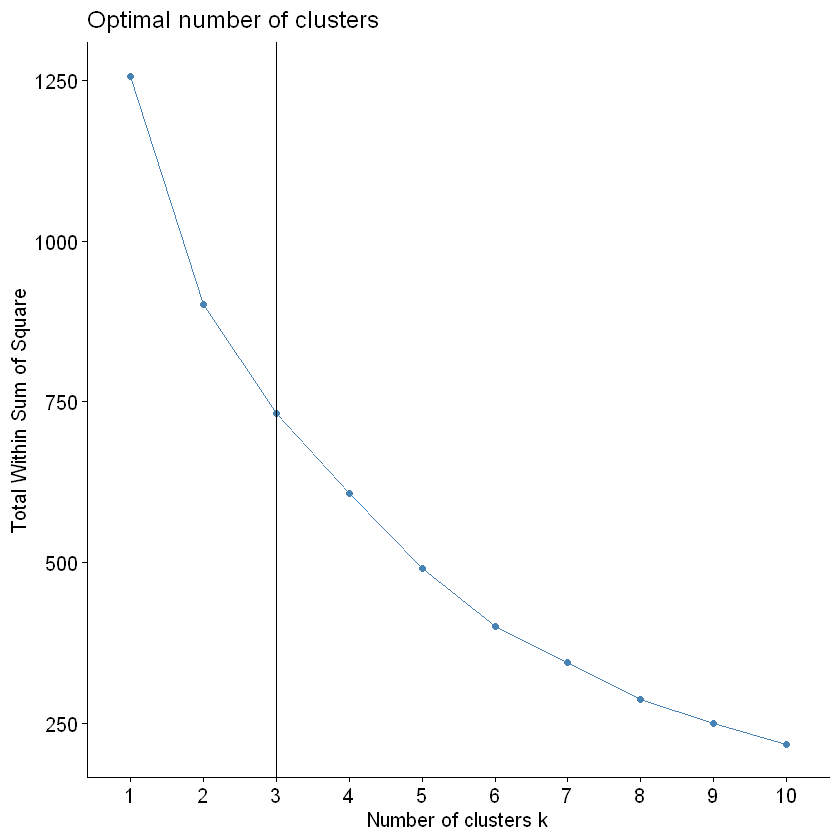

In [7]:
fviz_nbclust(groupe_etude, hcut, method = "wss")+geom_vline(xintercept= 3)
print("Le nombre idéal de clusters est de 3")

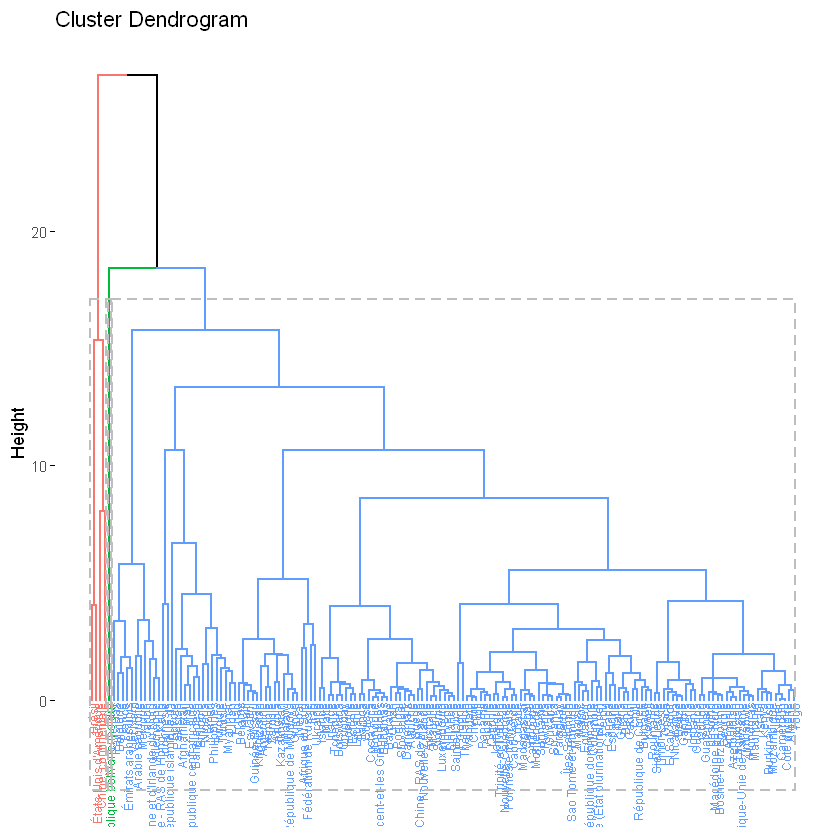

In [8]:
#On prépare la classification hierarchique ascendante
res_hca = hcut(groupe_etude, k = 3, stand = TRUE)
fviz_dend(res_hca, rect = TRUE, cex = 0.5)

<h1> Partitionnement K-means </h1>

[1] "Encore une fois le nombre idéal de clusters semble etre 3"


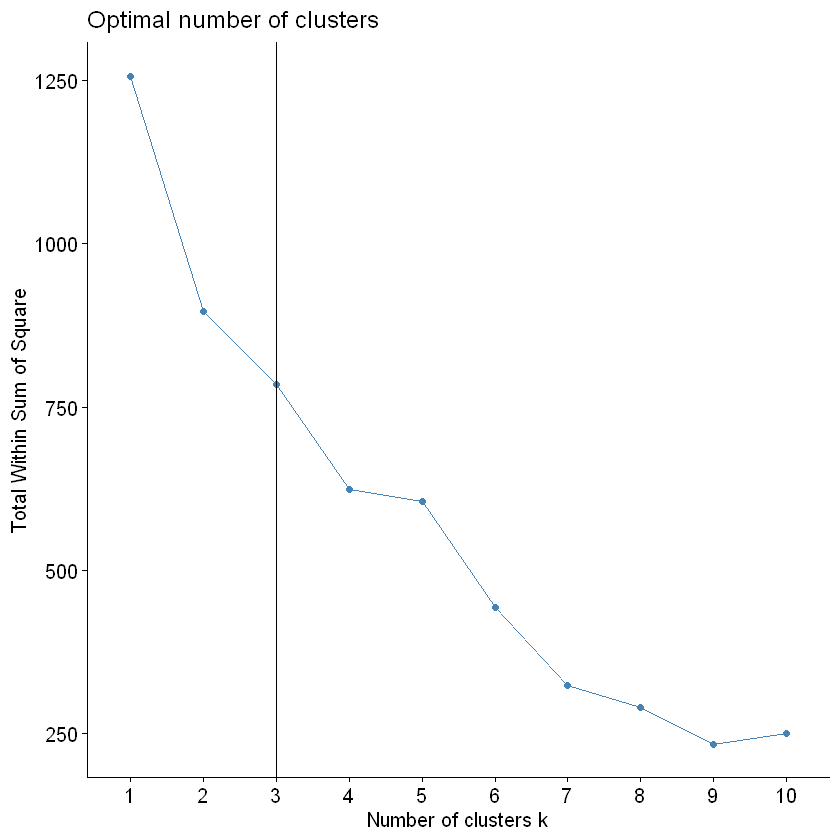

In [9]:
#On utilise fviz_nbclust pour déterminer le nombre idéal de clusters à choisir.
fviz_nbclust(groupe_etude, kmeans, method = "wss")+geom_vline(xintercept= 3)
print("Encore une fois le nombre idéal de clusters semble etre 3")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


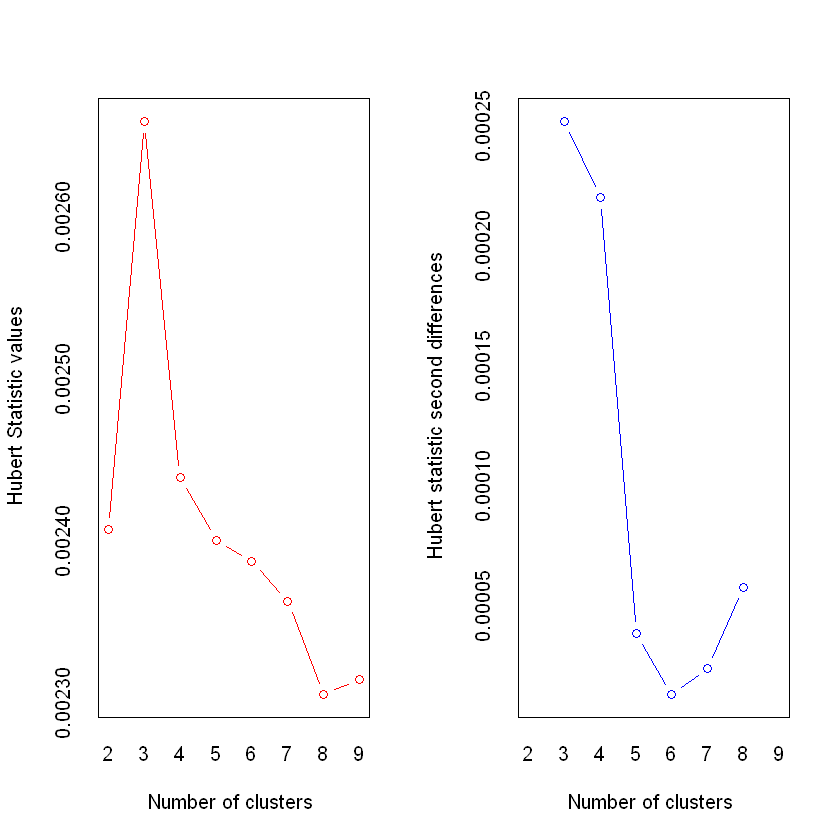

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 12 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 
Among all indices: 
* 2 proposed  0 as the best number of clusters
* 6 proposed  2 as the best numbe

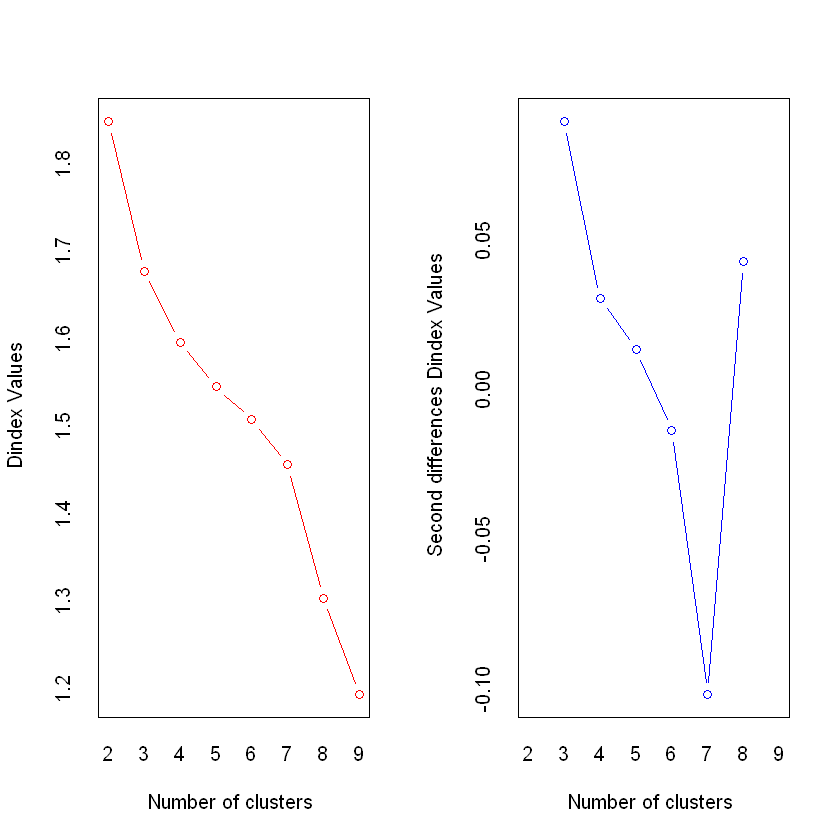

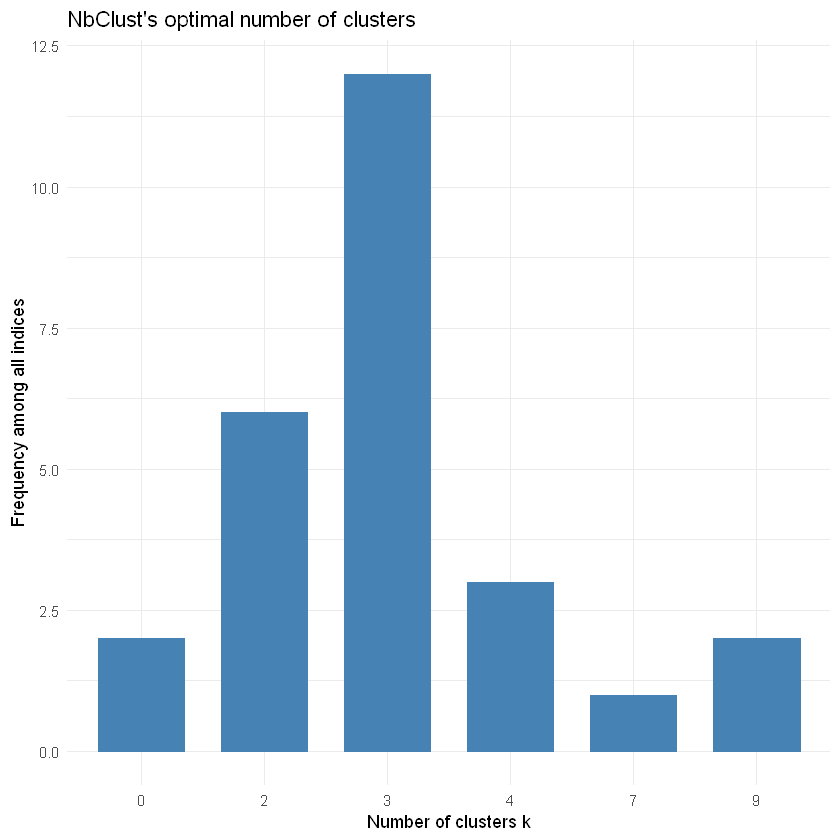

In [10]:
res.nbclust <- NbClust(groupe_etude, distance = "euclidean",
                  min.nc = 2, max.nc = 9, 
                  method = "complete", index ="all")
factoextra::fviz_nbclust(res.nbclust) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

<h3> Répartition Dim1 et Dim2 </h3>

In [11]:
km.res = kmeans(groupe_etude, 3, nstart = 25)

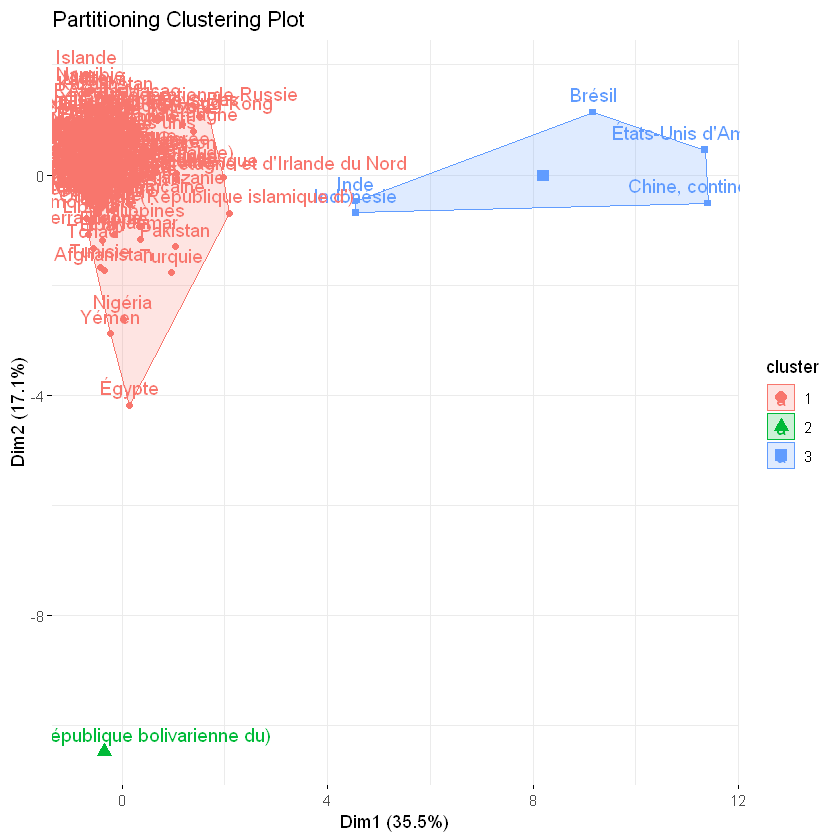

In [12]:
fviz_cluster(km.res, data = groupe_etude, ggtheme = theme_minimal(), main = "Partitioning Clustering Plot")

In [13]:
km.res

K-means clustering with 3 clusters of sizes 152, 1, 5

Cluster means:
  Émissions..CO2eq..Viande..volaille.gigagrammes Population
1                                    -0.15370615 -0.1367374
2                                     0.07633633 -0.1022738
3                                     4.65739972  4.1772719
  Production.Viande.de.Volailles.Milliers.de.tonnes
1                                       -0.14364686
2                                       -0.06446917
3                                        4.37975845
  Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes
1                                                    -0.00157468
2                                                    -0.35512816
3                                                     0.11889590
  Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes
1                                                     -0.1078302
2                                                     -0.2366861
3                          

In [14]:
print("Le cluster 3 présente le plus de variations des valeurs avec un ecart large dans la dimension 1")
print("Le cluster 1 parait plus représentatifs de la dimension 2 ")
print("Le cluster 2 présente une seul valeur")

[1] "Le cluster 3 présente le plus de variations des valeurs avec un ecart large dans la dimension 1"
[1] "Le cluster 1 parait plus représentatifs de la dimension 2 "
[1] "Le cluster 2 présente une seul valeur"


<h3> Etude Dim1 et Dim3 </h3>

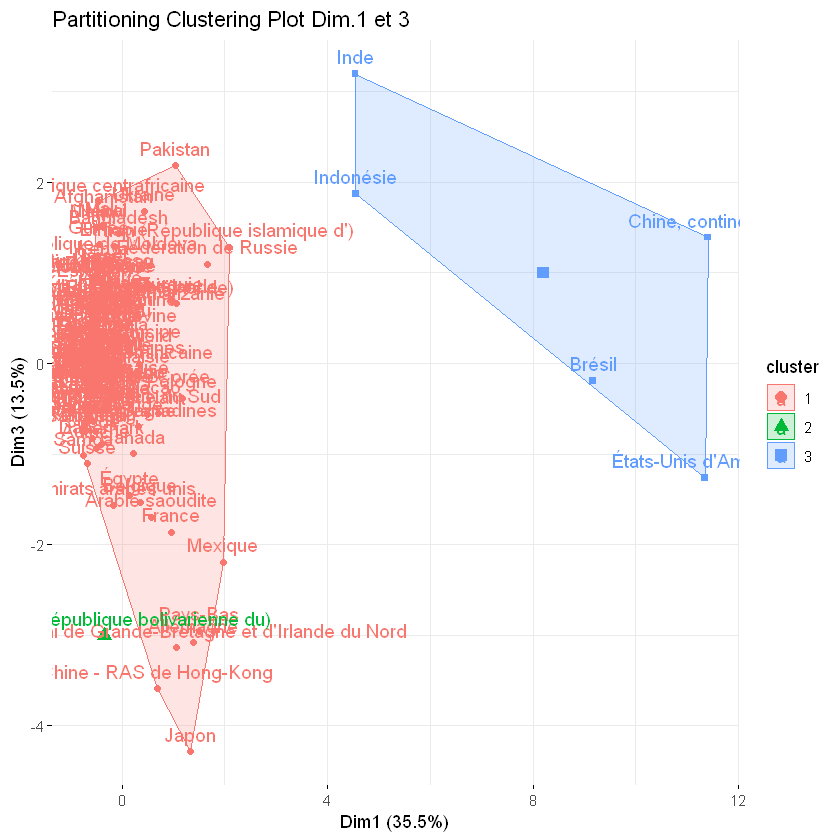

In [15]:
fviz_cluster(km.res, data = groupe_etude, axes = c(1,3), ggtheme = theme_minimal(), main = "Partitioning Clustering Plot Dim.1 et 3")

In [16]:
print("Le cluster 1 est le cluster le plus centrés autour la dimension 3")

[1] "Le cluster 1 est le cluster le plus centrés autour la dimension 3"


<h3> Etude Dim2 et Dim4 </h3>

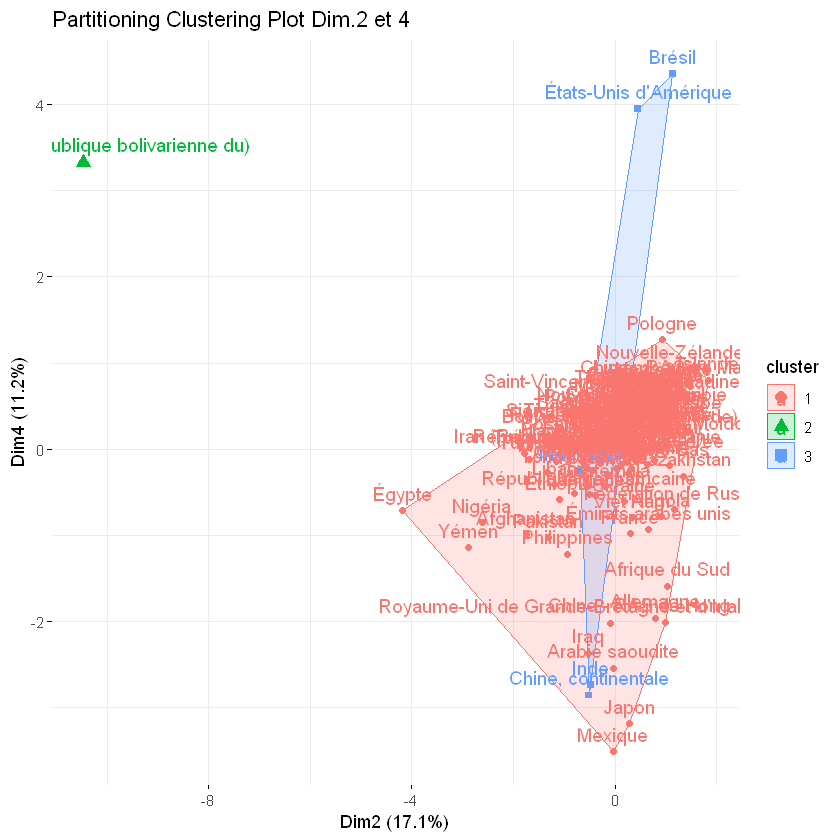

In [17]:
fviz_cluster(km.res, data = groupe_etude, axes = c(2,4), ggtheme = theme_minimal(), main = "Partitioning Clustering Plot Dim.2 et 4")

In [18]:
print("Le cluster 3 a la plus ecart de points par rapport a la dim4")
print("Le cluster 2 corrélé positivement à la dim4")

[1] "Le cluster 3 a la plus ecart de points par rapport a la dim4"
[1] "Le cluster 2 corrélé positivement à la dim4"


<h1> Analyses par PCA </h1>

In [19]:
res = PCA((donnees_etudes) %>% select(!c("Zone")))
var = get_pca_var(res)

In [20]:
res

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 158 individuals, described by 8 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

<h4> Eigenvalues et variances </h4>

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.8401139,35.501423,35.50142
Dim.2,1.3646986,17.058732,52.56016
Dim.3,1.0830537,13.538172,66.09833
Dim.4,0.8971982,11.214978,77.31330
Dim.5,0.7278311,9.097889,86.41119
Dim.6,0.6905002,8.631252,95.04245


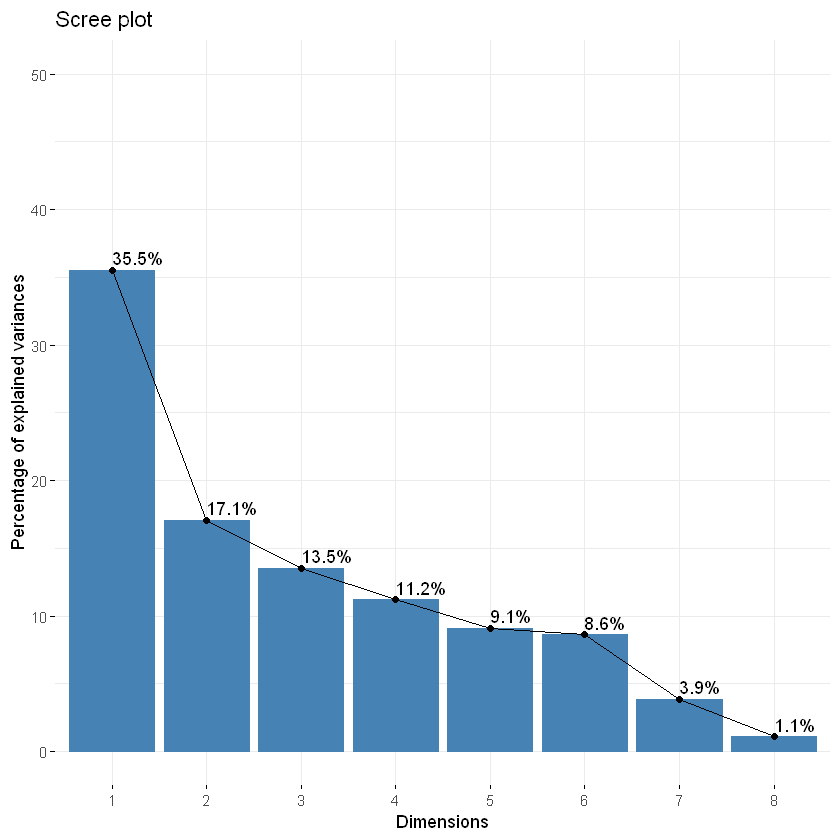

In [21]:
head(get_eig(res))
#On visualise les valeurs
fviz_screeplot(res, addlabels = TRUE, ylim = c(0, 50))

On voit que 86,4% de nos valeurs sont expliqué à 5 dimensions contre 77,3% à 4 dimensions mais on va se limiter a 4 dimensions pour nos analyses.

<h4> Contribution Des Variables </h4>

In [22]:
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [23]:
(var$coord)
(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Émissions..CO2eq..Viande..volaille.gigagrammes,0.87165217,-0.07134656,-0.1259401,0.01348353,0.04093447
Population,0.71963951,-0.09579029,-0.2425804,-0.33349953,0.31768106
Production.Viande.de.Volailles.Milliers.de.tonnes,0.95662864,0.02186272,0.0321823,0.14364995,-0.04165670
Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,0.27472708,0.11436740,0.6495646,-0.64023645,0.03731350
Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,0.74765884,0.12560573,0.2078266,0.40900419,-0.28291217
Prix.à.la.Consommation..Indices.généraux..2015...100..,-0.01679062,-0.72624967,0.2142853,0.27585989,0.53283882
Croissance.annuelle.US..Produit.Intérieur.Brut..,0.04481148,0.68805636,-0.4278633,-0.00175516,0.40021545
Stabilité.politique.et.absence.de.violence.terrorisme..indice.,-0.10275346,0.56589543,0.5596434,0.33447013,0.31301401


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Émissions..CO2eq..Viande..volaille.gigagrammes,26.751656596,0.37300041,1.46446208,2.026371e-02,0.2302225
Population,18.234516252,0.67236675,5.43326984,1.239658e+01,13.8660263
Production.Viande.de.Volailles.Milliers.de.tonnes,32.221889680,0.03502447,0.09562781,2.299972e+00,0.2384180
Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,2.657462831,0.95844632,38.95782020,4.568697e+01,0.1912940
Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,19.682088951,1.15606484,3.98797175,1.864520e+01,10.9969595
Prix.à.la.Consommation..Indices.généraux..2015...100..,0.009926541,38.64872420,4.23969529,8.481813e+00,39.0086640
Croissance.annuelle.US..Produit.Intérieur.Brut..,0.070703820,34.69055834,16.90285531,3.433562e-04,22.0068085
Stabilité.politique.et.absence.de.violence.terrorisme..indice.,0.371755328,23.46581468,28.91829772,1.246885e+01,13.4616072


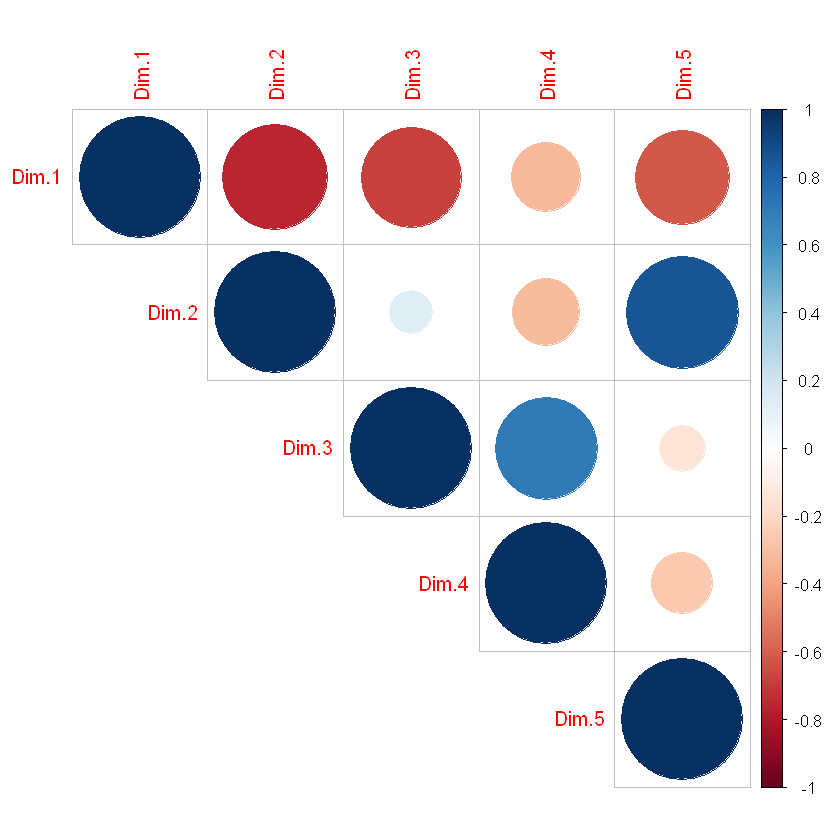

In [24]:
corrplot(var$contrib %>% cor, type='upper')

<h2> Analyse Corrélation Variables </h2>

<h3> Dim1 et Dim2 </h3>

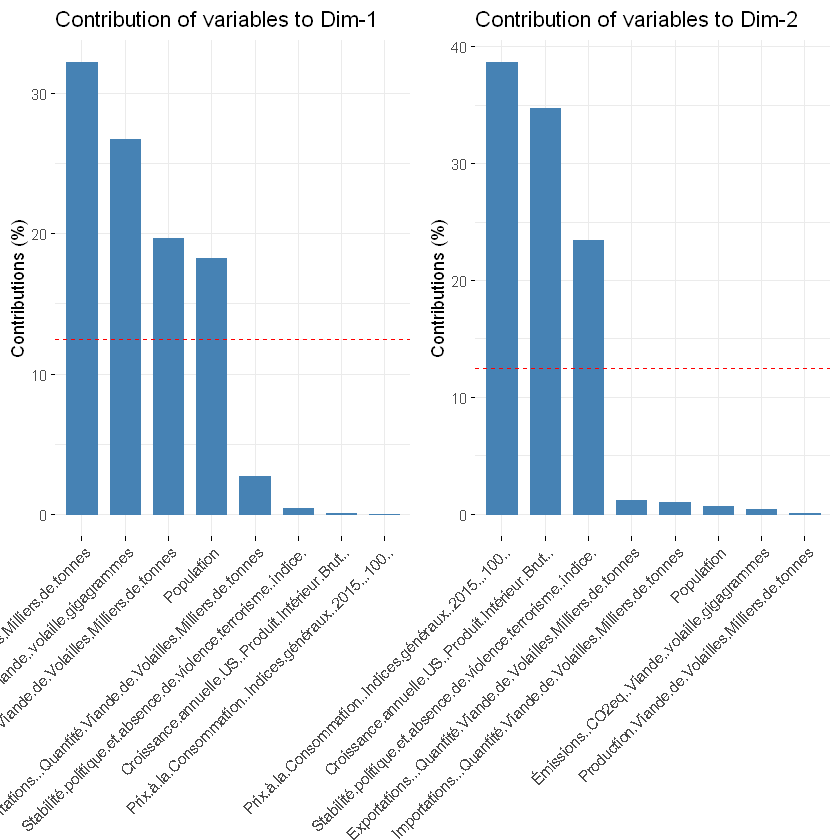

In [25]:
# Contributions des variables au Dim1 et Dim2.
plot_grid(fviz_contrib(res, choice = "var", axes = 1, top = 10), 
          fviz_contrib(res,choice = "var", axes = 2, top = 10))

<h2> Caractéristiques des dimensions: </h2>
<br> Dim1: forte économie volailles </br>
<br> dim2: developement economique </br>
<br> dim3: Santé du marché </br>
<br> dim4: Marché travail </br>

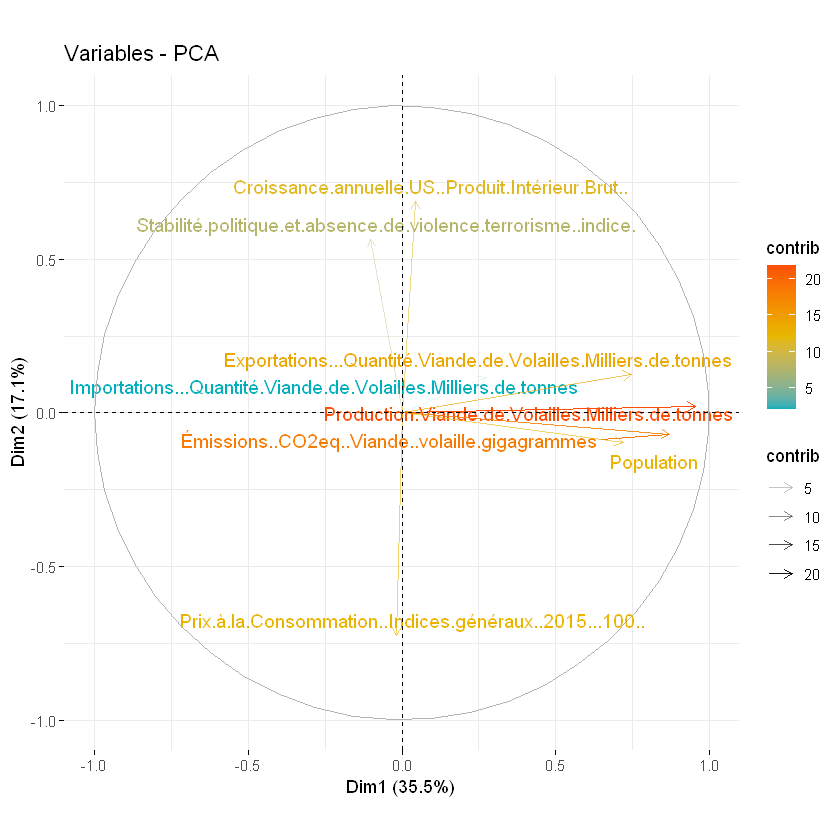

In [26]:
fviz_pca_var(res, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             alpha.var="contrib"
             )

<h3> Dim1 et Dim3 </h3>

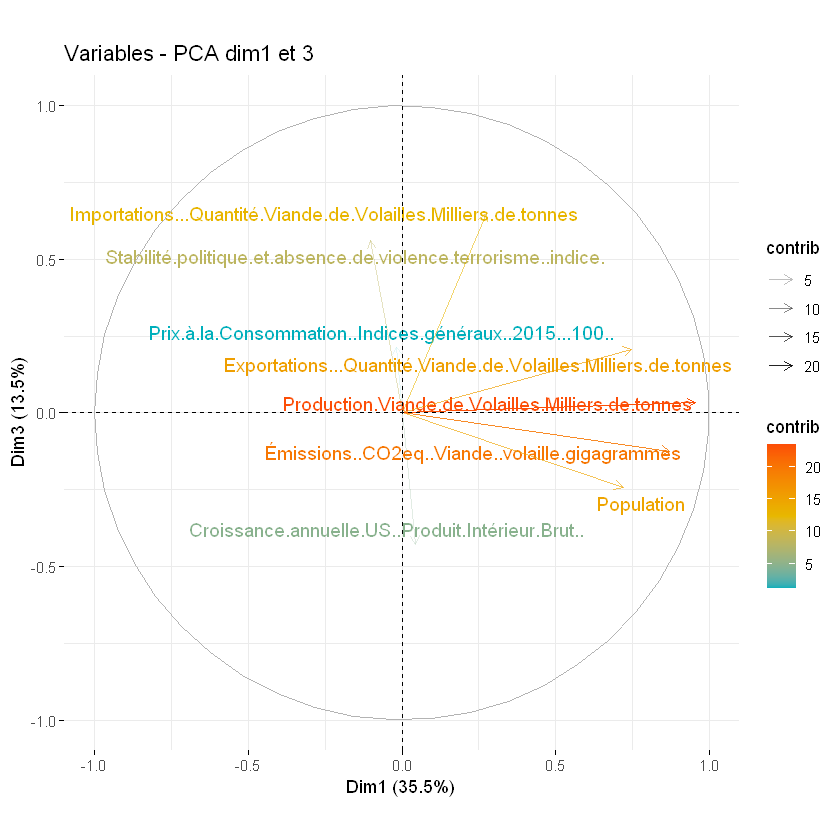

In [27]:
fviz_pca_var(res, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, 
             alpha.var="contrib",
             axes=c(1,3),
             title="Variables - PCA dim1 et 3"
             )

<h3> Dim 2 et Dim4 </h3>

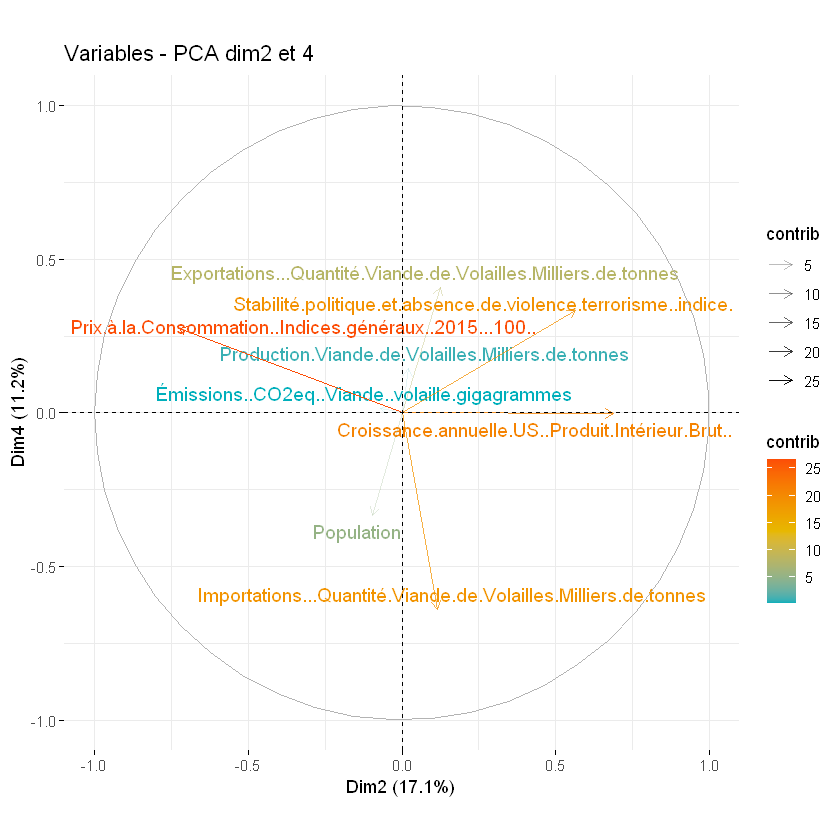

In [28]:
fviz_pca_var(res, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, 
             alpha.var="contrib",
             axes=c(2,4),
             title="Variables - PCA dim2 et 4"
             )

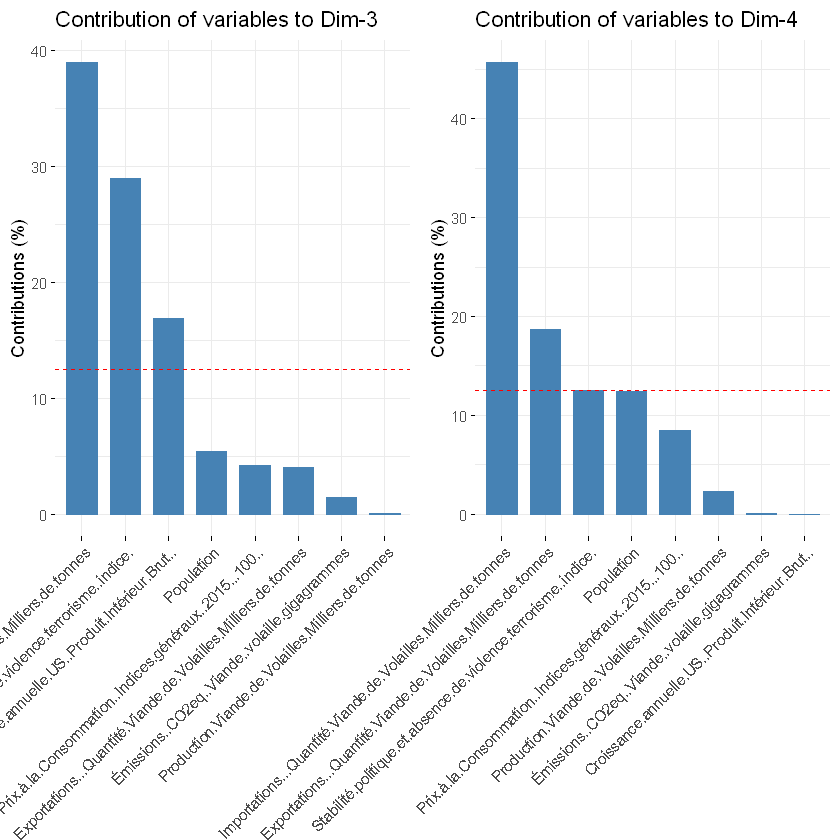

In [29]:
# Contributions variables à PC3
plot_grid(fviz_contrib(res, choice = "var", axes = 3, top = 10),
          fviz_contrib(res, choice = "var", axes = 4, top = 10))

<h2> Analyses Corrélation Individus </h2>

In [30]:
ind = get_pca_ind(res)
ind
head(ind$coord)

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Afghanistan,-0.3501583,-1.7446682,-1.666546e+00,-0.9972015,-1.34220549
Afrique du Sud,0.7105057,1.0376007,5.523690e-01,-1.6010368,0.76680462
Albanie,-0.6315922,0.4810398,-9.249048e-05,0.2872361,0.22333837
Algérie,-0.2002264,-0.6465282,-7.692651e-01,-0.1442136,-0.43173460
Allemagne,1.3877947,0.7950953,3.090563e+00,-1.9729164,-0.02949961
Angola,-0.1844039,0.9160148,-3.532209e-01,-0.7904370,1.12158912


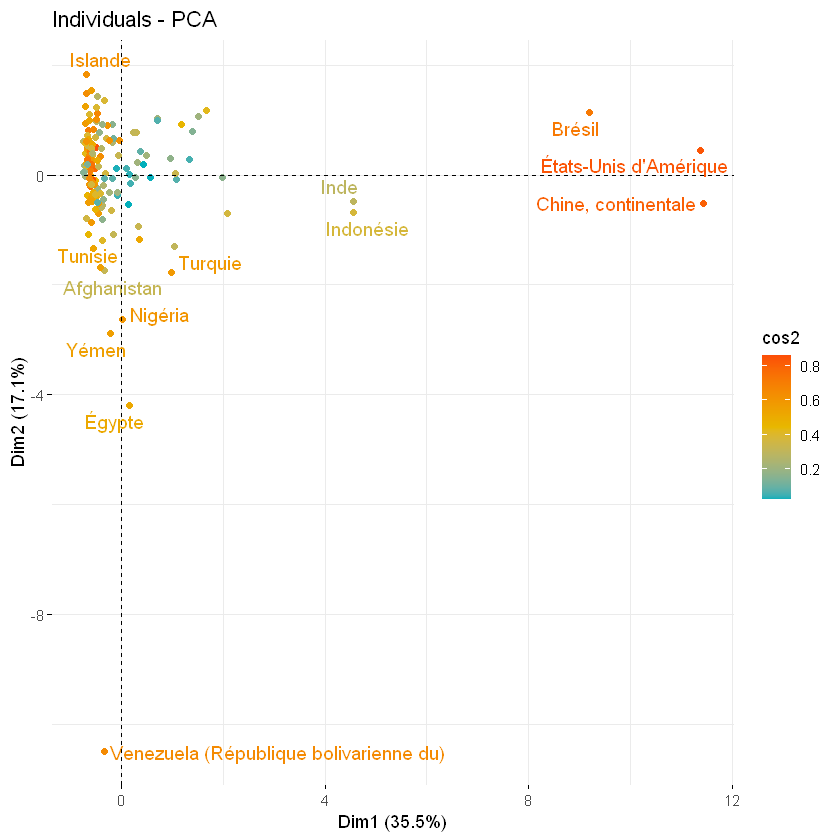

In [31]:
fviz_pca_ind(res, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping (slow if many points)
             )

In [32]:
print("Chine, Etats Unis et Brazil fortement représenté dans la dim1, forte économie agricole")
print("Pays d'afrique et Venezuela correlement negativement a la dim2, developement economique")

[1] "Chine, Etats Unis et Brazil fortement représenté dans la dim1, forte économie agricole"
[1] "Pays d'afrique et Venezuela correlement negativement a la dim2, developement economique"


[1] "Chine, Japon, Inde, Royaume_Unis fortement représenté dans la dim3, marché de travail agricole"


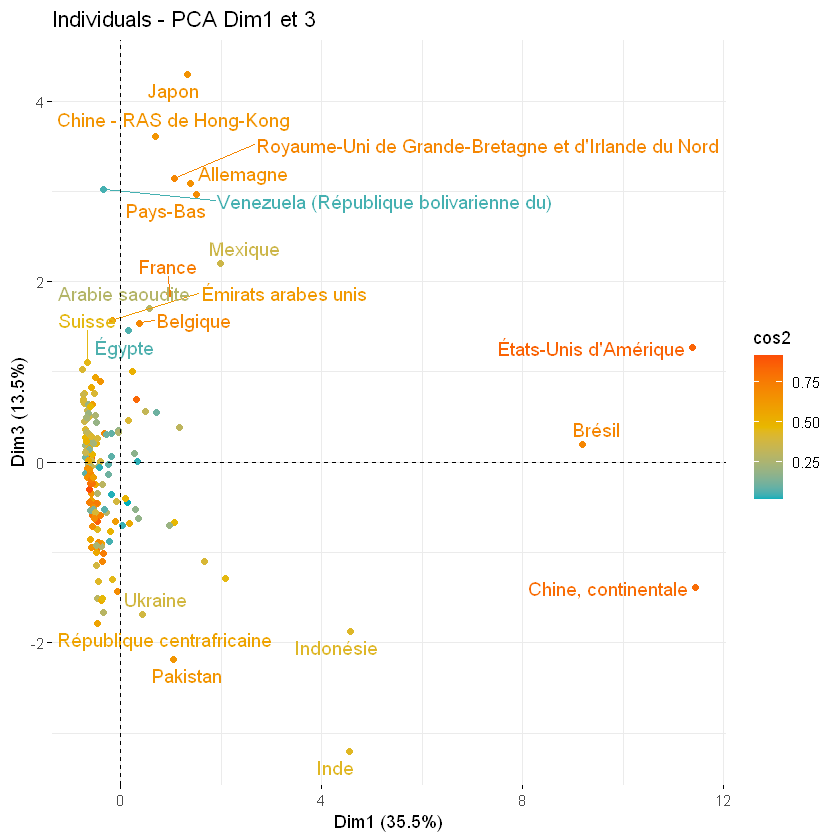

In [33]:
fviz_pca_ind(res, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,
             axes=c(1,3),
            title="Individuals - PCA Dim1 et 3")

print("Chine, Japon, Inde, Royaume_Unis fortement représenté dans la dim3, marché de travail agricole")

[1] "Brésil, Etats-Unis, Venezuela fortement representé dans la dimension 4, main d'oeuvre"


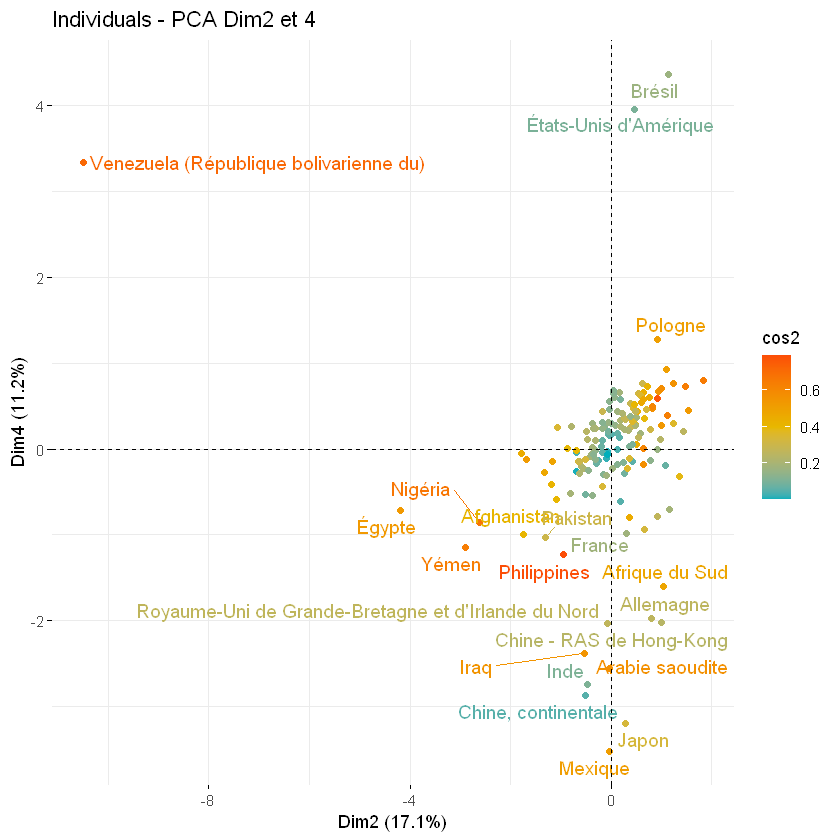

In [34]:
fviz_pca_ind(res, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,
             axes=c(2,4),
            title="Individuals - PCA Dim2 et 4")

print("Brésil, Etats-Unis, Venezuela fortement representé dans la dimension 4, main d'oeuvre")

<h2> Analyse Biplot individus et Variables </h2>

<h2> Rappel Caractéristiques des dimensions: </h2>
<br> Dim1: forte économie agricole </br>
<br> dim2: developement economique </br>
<br> dim3: marché de travail agricole </br>
<br> dim4: Marché travail, main d'oeuvre </br>

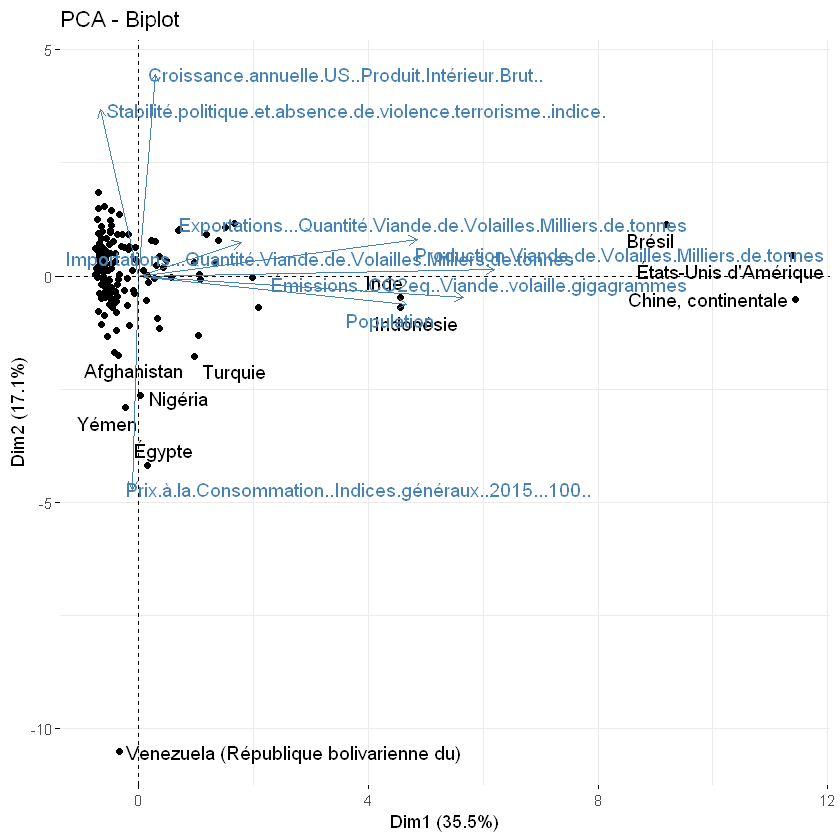

In [35]:
# Biplot of individuals and variables
fviz_pca_biplot(res, repel = TRUE)

A partir de nos clusters obtenu, on pourra faire une recommendation de pays potentiellement intéressant.

In [36]:
#On obtient le top 10 des pays les plus reprentés dans la dimension 1 et 2.
recommandation = ind$coord
recommandation =as.data.frame(recommandation)
recommandation = tibble::rownames_to_column(recommandation)
recomm_1 = merge(head(recommandation[order(-recommandation$Dim.1),], 60), head(recommandation[order(-recommandation$Dim.2),], 60))
recomm_1

rowname,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afrique du Sud,0.71050571,1.0376007,0.55236895,-1.601036768,0.76680462
Allemagne,1.38779471,0.7950953,3.09056332,-1.972916353,-0.02949961
Angola,-0.18440393,0.9160148,-0.35322088,-0.790436985,1.12158912
Argentine,0.29340517,0.7680345,-0.52624901,0.599801533,0.60860476
Australie,-0.17905617,0.5932123,0.31427698,0.638775412,0.32163296
Bélarus,-0.29788772,0.6604767,-0.56079251,0.356732860,0.37279685
Belgique,0.36430696,0.4240336,1.53850308,-0.147998889,-0.42920807
Brésil,9.19592688,1.1407694,0.19471108,4.370152552,-2.25142983
Canada,0.22711857,0.7779922,1.00184731,0.224657715,0.37690927


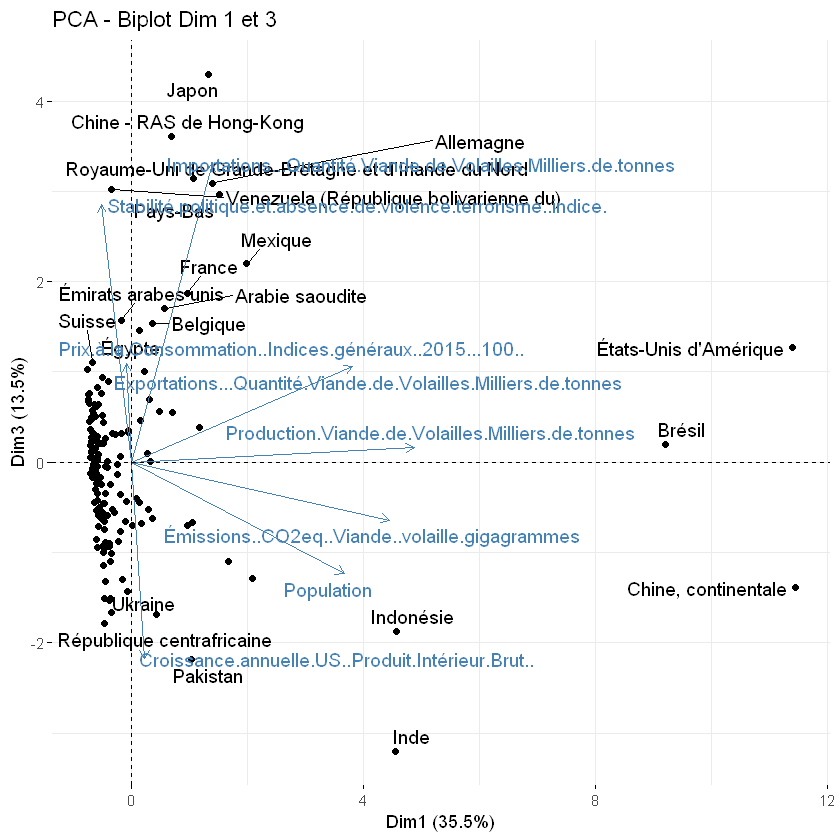

In [37]:
fviz_pca_biplot(res, repel = TRUE, axes = c(1,3), title = "PCA - Biplot Dim 1 et 3")

<h1> Analyse du Cluster 1: Pays Potentiellement Intéressant</h1>

In [38]:
groupe_etude = as.data.frame(groupe_etude)

[1] "Ici le nombre idéal de clusters est de 3"


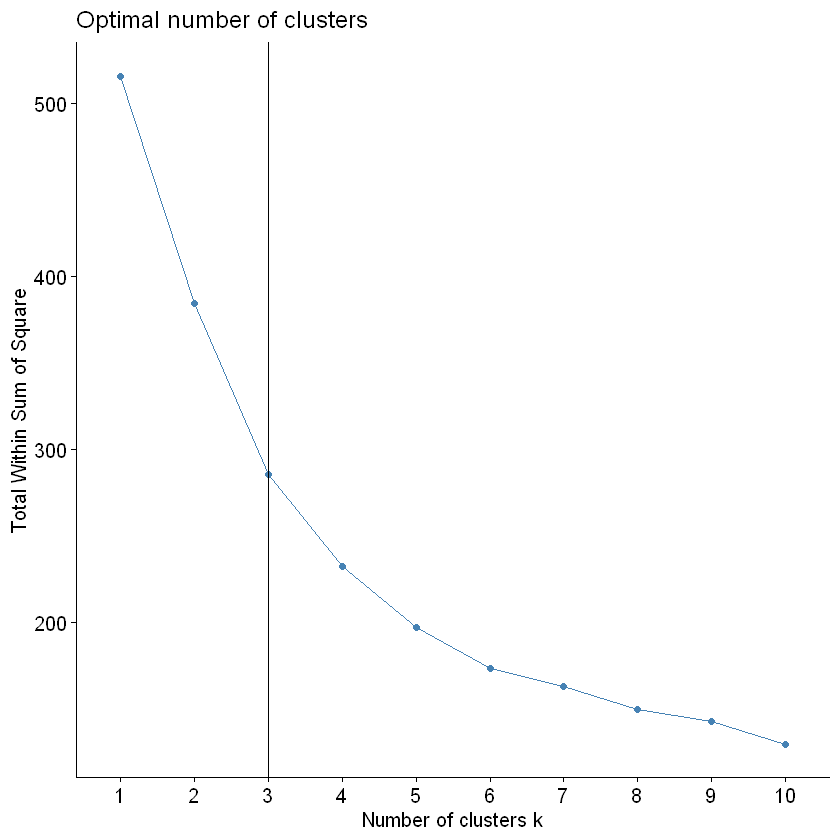

In [39]:
groupe_etude$clusters = km.res$cluster
groupe_cluster3 = groupe_etude %>% filter (clusters == 1)
groupe_cluster3 = groupe_cluster3 %>% select(names(groupe_cluster3)[-9])
print("Ici le nombre idéal de clusters est de 3")
fviz_nbclust(groupe_cluster3, kmeans, method = "wss")+geom_vline(xintercept= 3)

In [40]:
head(groupe_cluster3)

,Émissions..CO2eq..Viande..volaille.gigagrammes,Population,Production.Viande.de.Volailles.Milliers.de.tonnes,Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,Prix.à.la.Consommation..Indices.généraux..2015...100..,Croissance.annuelle.US..Produit.Intérieur.Brut..,Stabilité.politique.et.absence.de.violence.terrorisme..indice.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-0.33760180,-0.05901959,-0.2866922,-0.3342460,-0.2366861,-0.07158115,-0.4708035,-3.0310010
Afrique du Sud,0.21679267,0.07094864,0.3500623,2.1977107,-0.1046026,-0.05508437,1.5536910,-0.2197278
Albanie,-0.33745068,-0.26866361,-0.2925197,-0.2872613,-0.2366861,-0.11302627,0.2978453,0.5165580
Algérie,0.10020723,-0.02706297,-0.1907323,-0.4752003,-0.2366861,-0.05335771,-0.2477300,-0.9337019
Allemagne,0.07088079,0.23188171,0.2906215,3.9100443,1.1176942,-0.12149950,-0.2236692,0.7508308
Angola,-0.20095101,-0.09967441,-0.2812532,0.9604452,-0.2366861,0.32484424,2.0234396,-0.3312863


<h3> Etude Dim1 et Dim2 </h3>

In [41]:
km.res = kmeans(groupe_cluster3, 3, nstart = 25)

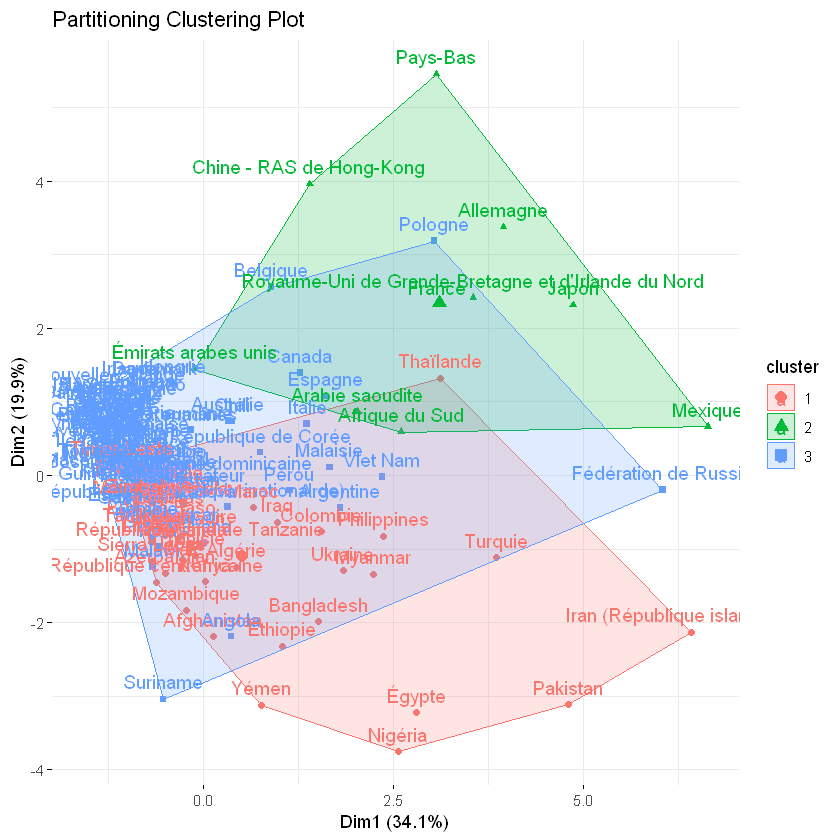

In [42]:
fviz_cluster(km.res, data = groupe_cluster3, ggtheme = theme_minimal(), main = "Partitioning Clustering Plot")

In [43]:
print("Le cluster 2 est le groupe le fortement corrélés a la dimension 1 et 2")
print("Le cluster 1 représente le plus la dimension 1 mais faiblement la dim2sont ")
print("Le cluster 3 présente le plus de pays centrer autour la dim1 et 2")

[1] "Le cluster 2 est le groupe le fortement corrélés a la dimension 1 et 2"
[1] "Le cluster 1 représente le plus la dimension 1 mais faiblement la dim2sont "
[1] "Le cluster 3 présente le plus de pays centrer autour la dim1 et 2"


<h3> Etude Dim1 et Dim3 </h3>

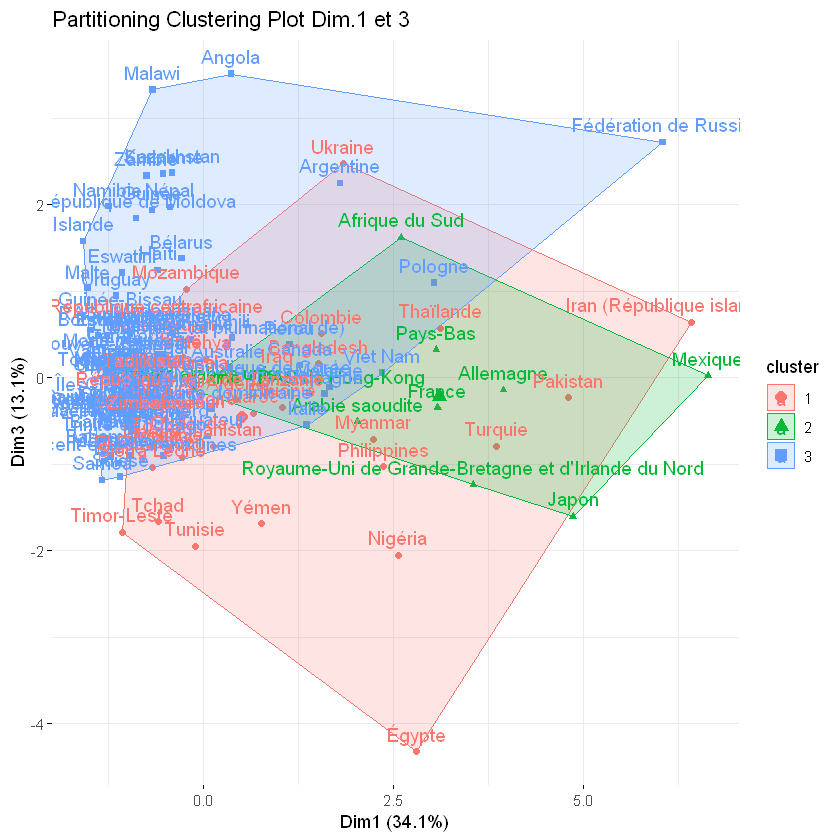

In [44]:
fviz_cluster(km.res, data = groupe_cluster3, axes = c(1,3), ggtheme = theme_minimal(), main = "Partitioning Clustering Plot Dim.1 et 3")

In [45]:
print("Le cluster 1 corrélé négativement a la dim3 mais positif dim1")
print("Le cluster 2 sont plus répartis vis a vis de la dim3")
print("Le cluster 3 corrélé positivement à la dim3 ")

[1] "Le cluster 1 corrélé négativement a la dim3 mais positif dim1"
[1] "Le cluster 2 sont plus répartis vis a vis de la dim3"
[1] "Le cluster 3 corrélé positivement à la dim3 "


<h3> Etude Dim2 et Dim4 </h3>

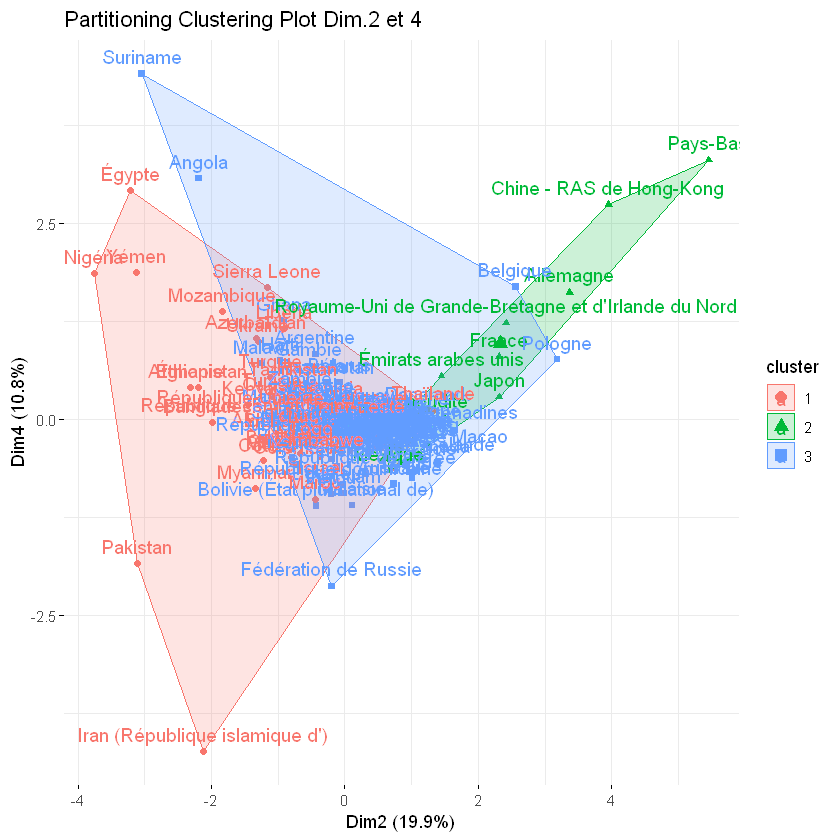

In [46]:
fviz_cluster(km.res, data = groupe_cluster3, axes = c(2,4), ggtheme = theme_minimal(), main = "Partitioning Clustering Plot Dim.2 et 4")

<h2> Hierarchical Clustering </h2>

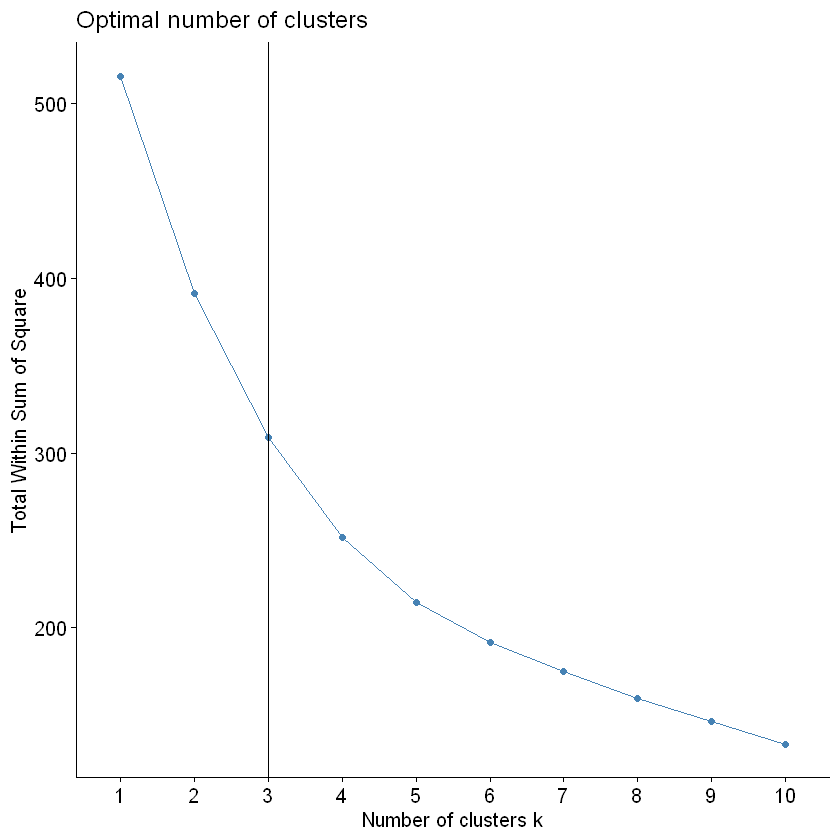

In [47]:
fviz_nbclust(groupe_cluster3, hcut, method = "wss")+geom_vline(xintercept= 3)

In [48]:
res_hca = hcut(groupe_cluster3, k = 3, stand = TRUE)
groupe_cluster_viz = groupe_cluster3
groupe_cluster_viz$cluster_km = km.res$cluster
groupe_cluster_viz$cluster_hca = res_hca$cluster
CrossTable(groupe_cluster_viz$cluster_km, groupe_cluster_viz$cluster_hca)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  152 

 
                              | groupe_cluster_viz$cluster_hca 
groupe_cluster_viz$cluster_km |         1 |         2 |         3 | Row Total | 
------------------------------|-----------|-----------|-----------|-----------|
                            1 |        31 |        13 |         1 |        45 | 
                              |     0.105 |     1.068 |     0.791 |           | 
                              |     0.689 |     0.289 |     0.022 |     0.296 | 
                              |     0.279 |     0.394 |     0.125 |           | 
                              |     0.204 |     0.086 |     0.007 |           | 
------------------------------|-----------|-----------|-----------|-----------|
                            2 |  

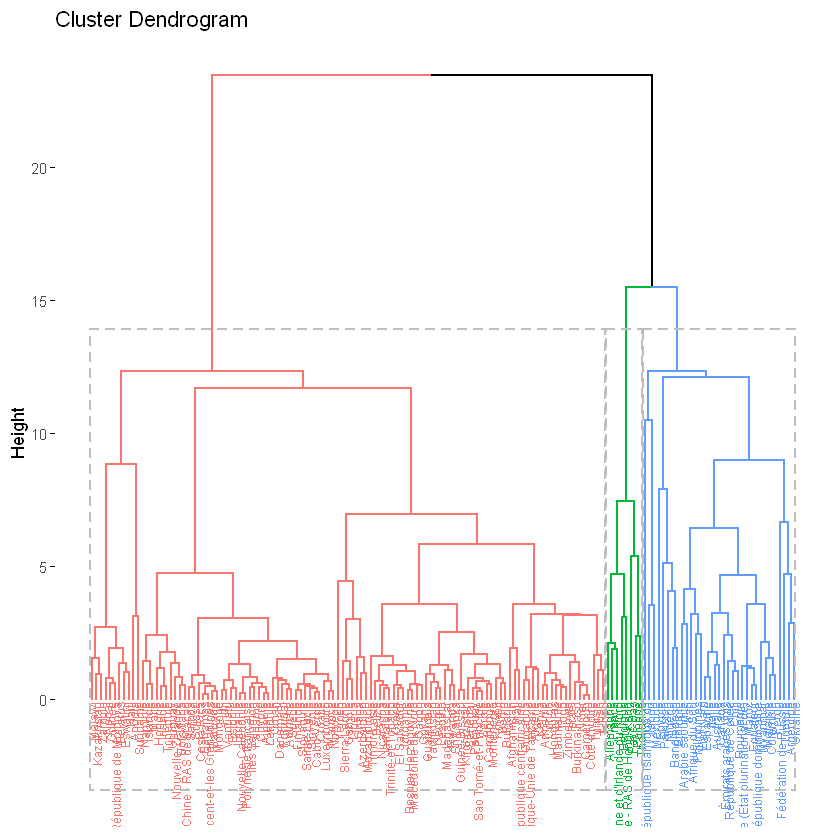

In [49]:
fviz_dend(res_hca, rect = TRUE, cex = 0.5)

In [50]:
print("On retrouve la meme répartitions des pays dans la methode hiérarchique et partitioning")

[1] "On retrouve la meme répartitions des pays dans la methode hiérarchique et partitioning"


<h2> Analyses PCA </h2>

In [51]:
res_cluster3 = PCA(groupe_cluster3)

In [52]:
head(get_eig(res_cluster3))

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.7298435,34.123043,34.12304
Dim.2,1.5920509,19.900636,54.02368
Dim.3,1.0459993,13.074992,67.09867
Dim.4,0.8616889,10.771111,77.86978
Dim.5,0.6238002,7.797503,85.66728
Dim.6,0.5737049,7.171311,92.83860


In [53]:
var_cluster = get_pca_var(res_cluster3)
(var_cluster$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Émissions..CO2eq..Viande..volaille.gigagrammes,21.3870370,1.2972266,0.1296801,19.50519624,7.6284108
Population,24.8463589,5.0393968,0.6010378,0.09450246,0.2480568
Production.Viande.de.Volailles.Milliers.de.tonnes,28.5435065,1.4965513,1.1595818,2.73630909,1.9323860
Importations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,12.6172032,14.9304214,0.1156012,9.81434558,0.7692771
Exportations...Quantité.Viande.de.Volailles.Milliers.de.tonnes,7.1361268,22.2295567,0.7343888,17.36840830,19.8904702
Prix.à.la.Consommation..Indices.généraux..2015...100..,0.7389721,21.0025551,12.9526398,43.95513350,18.7107931
Croissance.annuelle.US..Produit.Intérieur.Brut..,0.4226955,0.4503466,83.5665487,6.18184960,4.8629962
Stabilité.politique.et.absence.de.violence.terrorisme..indice.,4.3081000,33.5539455,0.7405218,0.34425523,45.9576099


<h3> Dim1 et Dim2 </h3>

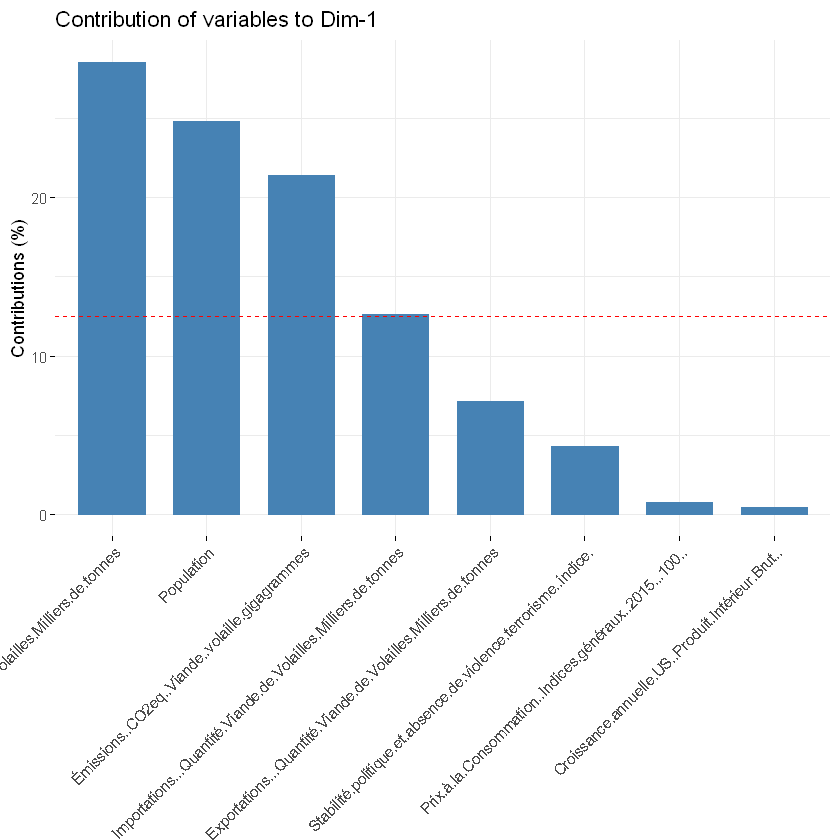

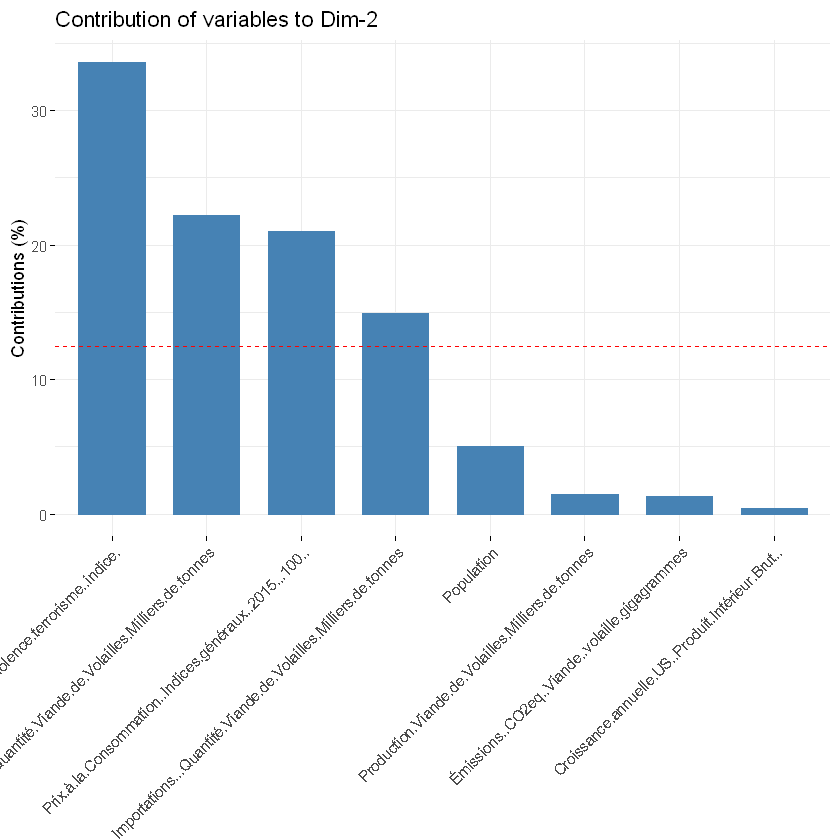

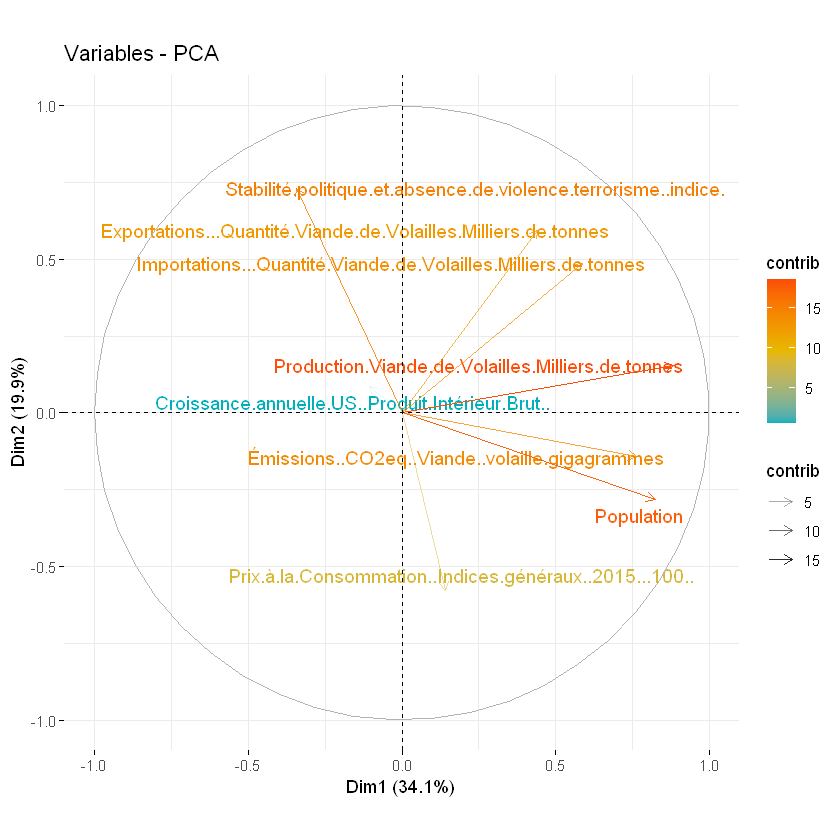

In [54]:
# Contributions of variables to PC1
fviz_contrib(res_cluster3, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res_cluster3, choice = "var", axes = 2, top = 10)

fviz_pca_var(res_cluster3, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             alpha.var="contrib"
             )

<h3> Dim1 et Dim3 </h3>

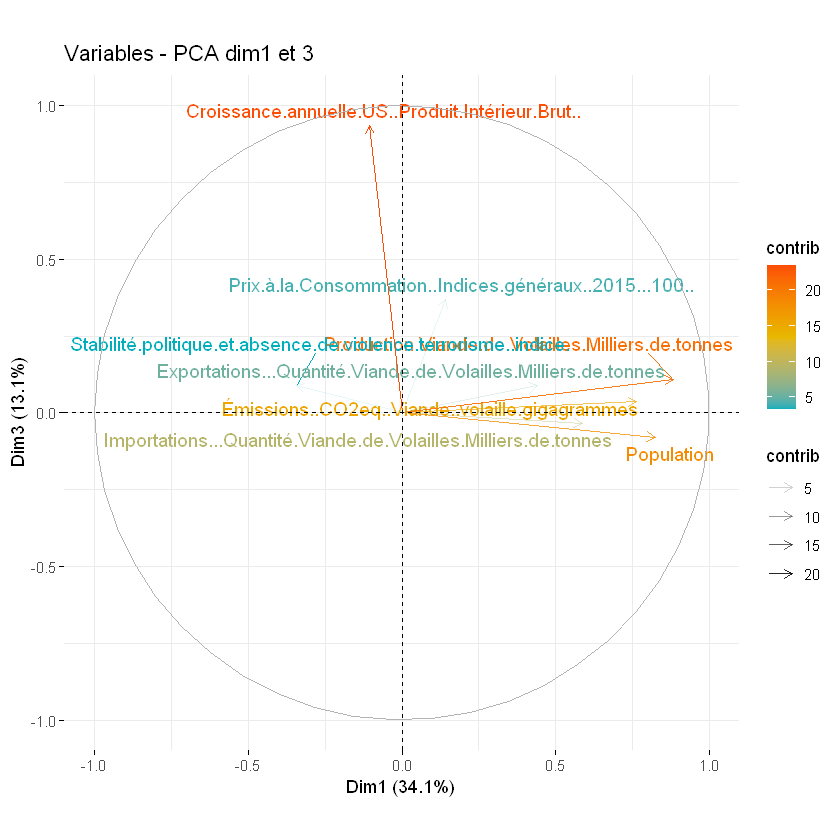

In [55]:
fviz_pca_var(res_cluster3, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, 
             alpha.var="contrib",
             axes=c(1,3),
             title="Variables - PCA dim1 et 3"
             )

<h2> Analyse Biplot individus et Variables </h2>

In [56]:
ind_cluster3 <- get_pca_ind(res_cluster3)
ind_cluster3

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

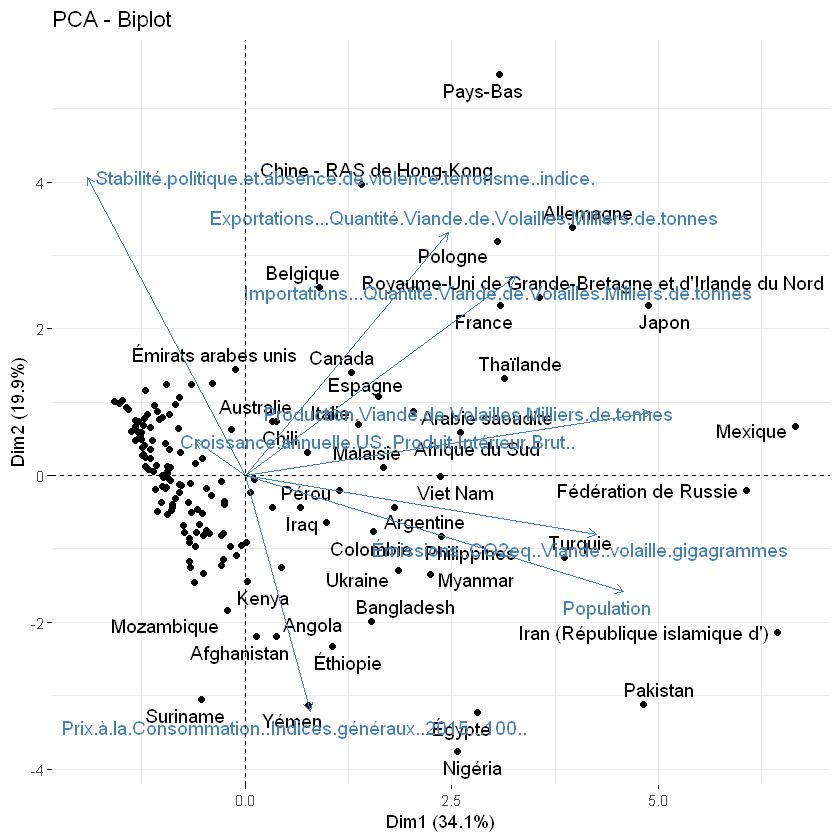

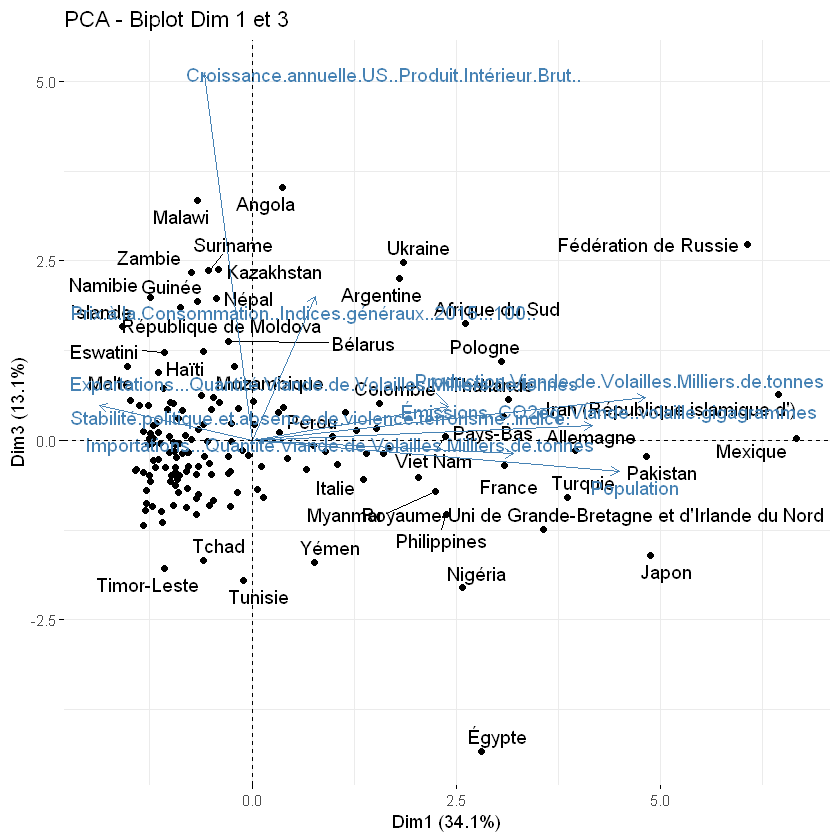

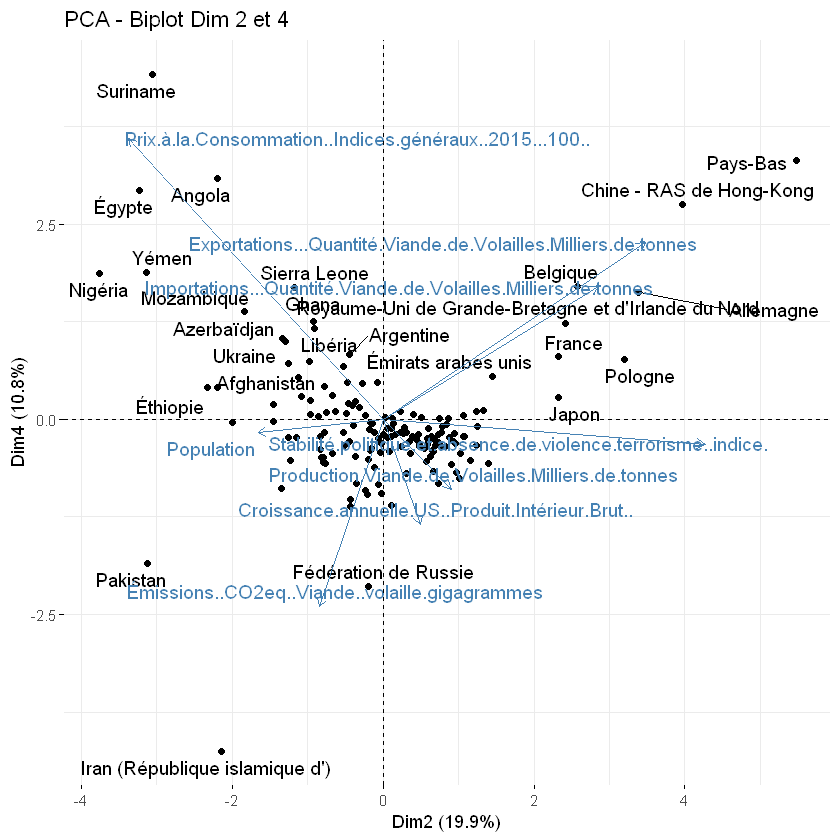

In [57]:
fviz_pca_biplot(res_cluster3, repel = TRUE)

fviz_pca_biplot(res_cluster3, repel = TRUE, axes = c(1,3), title = "PCA - Biplot Dim 1 et 3")

fviz_pca_biplot(res_cluster3, repel = TRUE, axes = c(2,4), title = "PCA - Biplot Dim 2 et 4")

In [58]:
recommandation_2 = ind_cluster3$coord
recommandation_2 =as.data.frame(recommandation_2)
recommandation_2 = tibble::rownames_to_column(recommandation_2)
recomm_2 = merge(head(recommandation_2[order(-recommandation_2$Dim.1),], 65), head(recommandation_2[order(-recommandation_2$Dim.2),], 65))
head(recomm_2)

,rowname,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afrique du Sud,2.6098354,0.5929122,1.6267466,-0.24726667,0.2729004
2,Allemagne,3.9575036,3.3829724,-0.1457245,1.62347578,-0.4250408
3,Arabie saoudite,2.0377924,0.8681759,-0.5144420,0.01398835,0.1328681
4,Australie,0.3346580,0.7407168,0.1116828,-0.82663575,0.7716718
5,Belgique,0.8965302,2.5694362,-0.1587936,1.69521805,-1.0631035
6,Canada,1.2812943,1.3992717,0.1393126,-0.56131591,0.8678315


In [59]:
recomm_1

rowname,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afrique du Sud,0.71050571,1.0376007,0.55236895,-1.601036768,0.76680462
Allemagne,1.38779471,0.7950953,3.09056332,-1.972916353,-0.02949961
Angola,-0.18440393,0.9160148,-0.35322088,-0.790436985,1.12158912
Argentine,0.29340517,0.7680345,-0.52624901,0.599801533,0.60860476
Australie,-0.17905617,0.5932123,0.31427698,0.638775412,0.32163296
Bélarus,-0.29788772,0.6604767,-0.56079251,0.356732860,0.37279685
Belgique,0.36430696,0.4240336,1.53850308,-0.147998889,-0.42920807
Brésil,9.19592688,1.1407694,0.19471108,4.370152552,-2.25142983
Canada,0.22711857,0.7779922,1.00184731,0.224657715,0.37690927


In [60]:
anti_join(recomm_1, recomm_2, "rowname")

rowname,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angola,-0.1844039,0.9160148,-0.3532209,-0.790436985,1.1215891
Argentine,0.2934052,0.7680345,-0.5262490,0.599801533,0.6086048
Bélarus,-0.2978877,0.6604767,-0.5607925,0.356732860,0.3727968
Brésil,9.1959269,1.1407694,0.1947111,4.370152552,-2.2514298
États-Unis d'Amérique,11.3836455,0.4564135,1.2700202,3.963213074,-2.1813205
Fédération de Russie,1.6647172,1.1677486,-1.0978807,-0.705454800,1.0977604
Kazakhstan,-0.3376428,1.3595362,-0.5225292,-0.315887906,1.0904078
Népal,-0.3701642,0.9229204,-1.5080695,-0.003817178,0.7598953


<h1> Recommendation </h1>

In [61]:
merge(recomm_1, recomm_2, "rowname")

rowname,Dim.1.x,Dim.2.x,Dim.3.x,Dim.4.x,Dim.5.x,Dim.1.y,Dim.2.y,Dim.3.y,Dim.4.y,Dim.5.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afrique du Sud,0.71050571,1.0376007,0.55236895,-1.601036768,0.76680462,2.6098354,0.5929122,1.62674656,-0.24726667,0.27290035
Allemagne,1.38779471,0.7950953,3.09056332,-1.972916353,-0.02949961,3.9575036,3.3829724,-0.14572449,1.62347578,-0.42504081
Australie,-0.17905617,0.5932123,0.31427698,0.638775412,0.32163296,0.3346580,0.7407168,0.11168283,-0.82663575,0.77167181
Belgique,0.36430696,0.4240336,1.53850308,-0.147998889,-0.42920807,0.8965302,2.5694362,-0.15879357,1.69521805,-1.06310352
Canada,0.22711857,0.7779922,1.00184731,0.224657715,0.37690927,1.2812943,1.3992717,0.13931264,-0.56131591,0.86783154
Chili,-0.05217834,0.6328649,0.34788902,0.009959054,0.30017120,0.3818718,0.7337991,0.46257693,-0.29413670,0.26611072
Chine - RAS de Hong-Kong,0.69521186,1.0001996,3.60545416,-2.015963960,-0.09420101,1.4048071,3.9698549,-0.18650086,2.74508140,-0.67053167
Émirats arabes unis,-0.17062012,0.6626248,1.57246147,-0.941285038,0.23571213,-0.1183308,1.4515712,-0.14291988,0.54900306,0.28982833
Hongrie,-0.28518870,0.9099485,0.30238396,0.589672836,0.37682593,-0.3985749,1.2544295,0.52087954,-0.09478508,-0.07814682


On obtient une liste de 6 pays potentiellement intéressant présent dans notre premiere analyse et notre 2eme analyse plus précis sur le cluster 1.